In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

# The curse of dimensionality

High dimensional spaces have a number of unintuitive properties.
In this problem, you are going to explore two features of high-dimensional spaces.
Points that are drawn from a probability distribution:
- tend to never be close together.
- tend to always be orthogonal (perpendicular).

## Part 1: The distribution of distances in a high-dimensional space

Let us consider a $d$-dimensional Euclidean space. 
Suppose we choose $m$ random points in the **unit cube**, i.e., points $x=\begin{bmatrix} x_1 & x_2 & \cdots & x_d \end{bmatrix}$, where each $x_i$ is in the range 0 to 1.
The Euclidean distance beween two points $x$ and $y$ is

$$
\|x-y\| = \sqrt{\sum_{i=1}^d(x_i-y_i)^2}
$$

If  $𝑑=2$, we are placing random points on a 1x1 square.

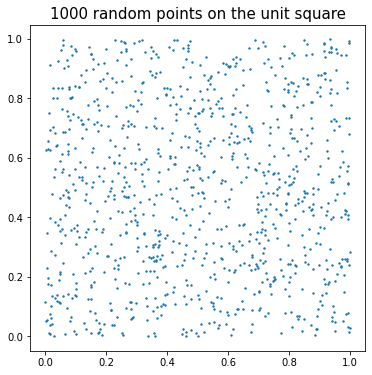

In [2]:
m = 1000
d=2
X = np.random.rand(m,d) # m random points on the unit square

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],s=2)
plt.title(str(m)+' random points on the unit square',fontsize=15)
plt.show()

Some points are be very close; some points are very far away (those at or near opposite corners of the square). The average distance is roughly $\sqrt{2/6}=\sqrt{1/3}\approx 0.58$.

In [3]:
# distance matrix
dist = pairwise_distances(X)
# we only need the upper triangular part of the distance matrix
dist = dist[np.triu_indices(m,k=1)]
# display: largest, smallest and average distance
print('the largest distance is '+str(np.max(dist)))
print('the smallest distance is '+str(np.min(dist)))
print('the average distance is '+str(np.mean(dist)))

the largest distance is 1.392529305852419
the smallest distance is 0.0002088077262019971
the average distance is 0.522958733671411


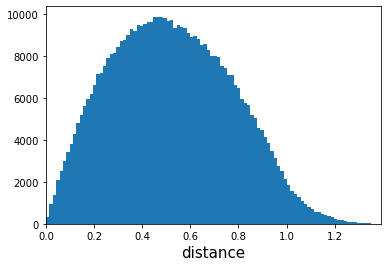

In [4]:
#  histogram plot of the distributions of all pairwise distances 
plt.hist(dist,bins=100)
plt.xlabel('distance',fontsize=15)
plt.xlim([0,np.max(dist)])
plt.show()

When the dimension  $d$ is very large, the distance between random points behaves very differently.

Set $d=2000$, and generate $m=1000$ random points on the unit square

In [5]:
m = 1000
d=2000
X = np.random.rand(m,d) # m random points on the unit square



Compute the largest, smallest and average distance

In [6]:
# distance matrix
dist = pairwise_distances(X)
# we only need the upper triangular part of the distance matrix
dist = dist[np.triu_indices(m,k=1)]
# display: largest, smallest and average distance
print('the largest distance is '+str(np.max(dist)))
print('the smallest distance is '+str(np.min(dist)))
print('the average distance is '+str(np.mean(dist)))

the largest distance is 19.52830502720241
the smallest distance is 17.040055259687286
the average distance is 18.254107511707325


Plot a histogram of all pairwise distances 

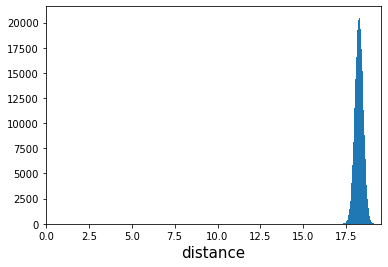

In [7]:
#  histogram plot of the distributions of all pairwise distances 
plt.hist(dist,bins=100)
plt.xlabel('distance',fontsize=15)
plt.xlim([0,np.max(dist)])
plt.show()

Observe that there are no pairs of points that are close!

## Part 2: The distribution of angles a high-dimensional space

Let us consider a  $d$-dimensional Euclidean space. 
Suppose we choose  two random vectors $x=\begin{bmatrix} x_1 & x_2 & \cdots & x_d \end{bmatrix}$ and $y=\begin{bmatrix} y_1 & y_2 & \cdots & y_d \end{bmatrix}$ (they can be anywhere in the space).
The angle  between the two vectors $x$ and $y$ is given by

$$
\mathrm{arccos}\left( \dfrac{\sum_{i=1}^d x_iy_i}{\sqrt{\sum_{i=1}^dx_i^2}\sqrt{\sum_{i=1}^d y_i^2}} \right) = 
\mathrm{arccos}\left( \dfrac{|x^Ty|}{\|x\|\|y\|} \right),
$$
i.e., the angle is given by the arccosine of the dot product of $x$ and $y$ divided by the product of the norms of $x$ and $y$.

When the dimension $𝑑=2$:

Text(0.5, 1.0, '1000 random vectors')

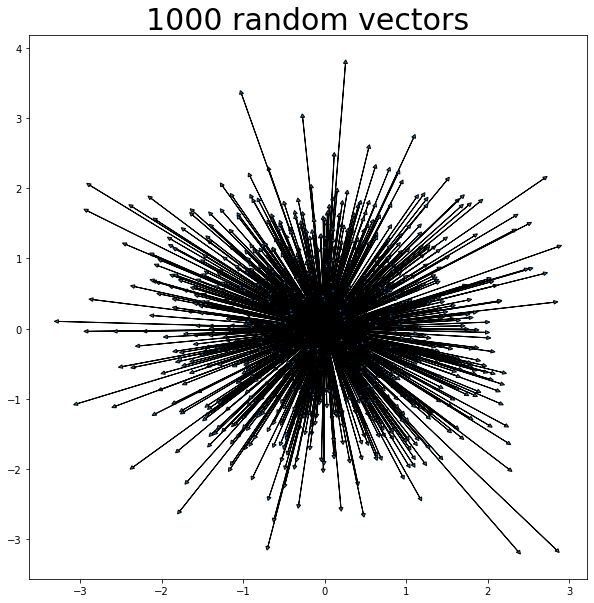

In [8]:
m = 1000
X = np.random.randn(m,2) # m random vectors (from a normal distribution)

plt.figure(figsize=(10,10))
for i in range(m):
    plt.arrow(0,0,X[i,0],X[i,1],head_width = 0.05,head_length=0.05)
plt.title(str(m)+' random vectors',fontsize=30)

Some vectors are close to being parallel; some vectors are close to being perpendicular. The average angle is roughly 90 degrees.

In [9]:
# cosine matrix
cosines = cosine_similarity(X)
# we only need the upper triangular part of the cosine matrix
cosines = cosines[np.triu_indices(m,k=1)]
# angles (in degrees)
angles = np.arccos(cosines)*(180/np.pi)
print('the largest angle is '+str(np.max(angles))+' degrees')
print('the smallest angle is '+str(np.min(angles))+' degrees')
print('the average angle is '+str(np.mean(angles))+' degrees')

the largest angle is 179.99985824528986 degrees
the smallest angle is 0.000350793970927641 degrees
the average angle is 90.01999036374485 degrees


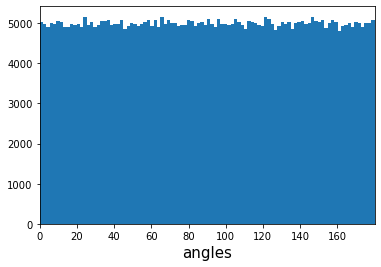

In [10]:
#  histogram plot of the distributions of all angles
plt.hist(angles,bins=100)
plt.xlabel('angles',fontsize=15)
plt.xlim([0,np.max(angles)])
plt.show()

When the dimension $d$ is very large, the angle between random vectors behaves very differently.

Set  $𝑑=2000$, and generate $𝑚=1000$ random vectors (from a normal distribution)

In [11]:
m = 1000
d = 2000
X = np.random.rand(m,d) # m random points on the unit square

Compute the largest, smallest and average angle

In [16]:
# cosine matrix
cosines = cosine_similarity(X)
# we only need the upper triangular part of the cosine matrix
cosines = cosines[np.triu_indices(m,k=1)]
# angles (in degrees)
angles = np.arccos(cosines)*(180/np.pi)
print('the largest angle is '+str(np.max(angles))+' degrees')
print('the smallest angle is '+str(np.min(angles))+' degrees')
print('the average angle is '+str(np.mean(angles))+' degrees')

the largest angle is 44.19741427744266 degrees
the smallest angle is 38.57261826525014 degrees
the average angle is 41.399238324493446 degrees


Plot a histogram of all angles

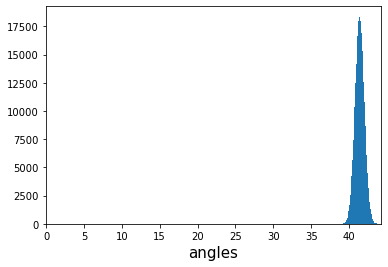

In [17]:
#  histogram plot of the distributions of all angles
plt.hist(angles,bins=100)
plt.xlabel('angles',fontsize=15)
plt.xlim([0,np.max(angles)])
plt.show()

The angle between any two random vectors is almost certain to be close to 90 degrees!